<a href="https://colab.research.google.com/github/pavannaidu/Simpsons-Data-Analysis/blob/master/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
characters_df = pd.read_csv('simpsons_characters.csv')
episodes_df = pd.read_csv('simpsons_episodes.csv')
locations_df = pd.read_csv('simpsons_locations.csv')

In [0]:
script_lines_df = pd.read_csv('simpsons_script_lines.csv'
                              ,sep=','
                              ,error_bad_lines = False
                              ,warn_bad_lines = False
                             ,low_memory = False #ensures no mixed data types
                             ) 
script_lines_df.dropna(inplace=True)

In [0]:
script_lines_df['character_id'] = script_lines_df['character_id'].astype(int)
script_lines_df.head().T
script_lines_df.dtypes

id                      int64
episode_id              int64
number                  int64
raw_text               object
timestamp_in_ms        object
speaking_line          object
character_id            int32
location_id           float64
raw_character_text     object
raw_location_text      object
spoken_words           object
normalized_text        object
word_count            float64
dtype: object

In [0]:
characters_df.head().T

,0,1,2,3,4
id,7,12,13,16,20
name,Children,Mechanical Santa,Tattoo Man,DOCTOR ZITSOFSKY,Students
normalized_name,children,mechanical santa,tattoo man,doctor zitsofsky,students
gender,NaN,NaN,NaN,NaN,NaN


In [0]:
print(len(script_lines_df))
print(len(characters_df))
merged = script_lines_df.merge(characters_df
                                ,how='inner'
                                ,left_on='character_id'
                                ,right_on='id'
                                ,suffixes=('_sl', '_c')
                               ).merge(locations_df
                                       ,how='inner'
                                       ,left_on='location_id'
                                       ,right_on='id'
                                       ,suffixes=(False, '_l')
                                      ).merge(episodes_df
                                             ,how='inner'
                                             ,left_on='episode_id'
                                             ,right_on='id'
                                             ,suffixes=(False,'_e'))

131685
6722


In [0]:
# merged.to_pickle('simpsons_data.pkl')
merged.columns = ['id', 'episode_id', 'line_number', 'line_raw_text'
                  , 'timestamp_in_ms', 'speaking_line', 'character_id'
                  , 'location_id', 'raw_character_text','raw_location_text'
                  , 'line_spoken_words', 'line_normalized_text', 'line_word_count'
                  , 'id_c', 'character_name', 'character_normalized_name', 'gender'
                  , 'id_l', 'location_name', 'location_normalized_name'
                  , 'id_e', 'episode_title', 'original_air_date', 'production_code'
                  , 'season', 'episode_number_in_season', 'episode_number_in_series'
                  , 'us_viewers_in_millions', 'views', 'imdb_rating', 'imdb_votes', 'image_url'
                  , 'video_url']
merged.drop(columns=['id_c','id_e', 'id_l'], inplace=True)


In [0]:
merged.head().T

,0,1,2,3,4
id,9549,9551,9345,9350,9543
episode_id,32,32,32,32,32
line_number,209,211,5,10,203
line_raw_text,"Miss Hoover: No, actually, it was a little of ...",Miss Hoover: I don't know. Although I'd sure l...,"Miss Hoover: Children, I won't be staying long...","Miss Hoover: The brain? Oh, dear God!","Miss Hoover: Good morning, Lisa."
timestamp_in_ms,848000,856000,40000,63000,829000
speaking_line,true,true,true,true,true
character_id,464,464,464,464,464
location_id,3,3,3,3,3
raw_character_text,Miss Hoover,Miss Hoover,Miss Hoover,Miss Hoover,Miss Hoover
raw_location_text,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School


In [0]:
merged.to_csv('simpsons_clean.csv')
merged.to_pickle('simpsons.pkl')

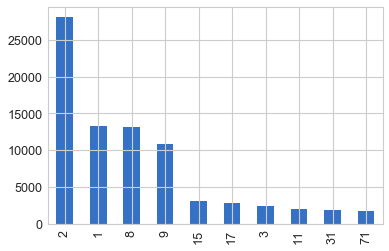

In [0]:
script_lines_df['character_id'].value_counts().head(n=10).plot(kind='bar')
plt.show()

In [0]:
df = pd.read_pickle('simpsons_data.pkl')

NameError: name 'pd' is not defined

In [0]:
df.head().T

NameError: name 'df' is not defined

In [0]:
# df.groupby(by=['season', 'nameFalse']).agg(np.size)
top_characters = df['nameFalse'].value_counts()[:10].index
top_df = df[df.nameFalse.isin(top_characters)]

In [0]:
temp = pd.DataFrame(top_df.groupby(by = ['season', 'nameFalse']).agg(np.size)['id_c'])

temp.reset_index(inplace=True)


In [0]:
temp.head().T

,0,1,2,3,4
season,1,1,1,1,1
nameFalse,Bart Simpson,C. Montgomery Burns,Chief Wiggum,Grampa Simpson,Homer Simpson
id_c,655,52,10,22,814


In [0]:
# import ipywidgets as widgets
# from ipywidgets import interact, interactive, fixed, interact_manual

In [0]:
# def plot_season(season):
#     t = temp[temp['season']==season][['nameFalse', 'id_c']].sort_values(by='id_c', ascending=False)
#     plt.bar(t.nameFalse, t['id_c'])
#     plt.xticks(rotation=90)
#     plt.show()
    
# interact(plot_season, season= np.arange(1,27))


NameError: name 'interact' is not defined

In [0]:
from bqplot import pyplot as plt

In [0]:
t = temp[temp['season']==2][['nameFalse', 'id_c']].sort_values(by='id_c', ascending=False)
plt.figure()
axes_options = {'x': {'label': 'Character'}, 'y': {'label': '#'}}
plt.bar(t['nameFalse'].values.astype(str), t['id_c'].values, axes_options=axes_options)

fig.axes[0].orientation = 'vertical'
plt.show()

In [0]:
t['id_c'].values

array([814, 655, 434, 271,  52,  51,  39,  22,  11,  10], dtype=int64)

In [0]:
t['nameFalse'].values.astype(str)

array(['Homer Simpson', 'Bart Simpson', 'Marge Simpson', 'Lisa Simpson',
       'C. Montgomery Burns', 'Seymour Skinner', 'Moe Szyslak',
       'Grampa Simpson', 'Ned Flanders', 'Chief Wiggum'], dtype='<U19')

In [0]:
dates = np.arange('2005-02', '2005-03', dtype='datetime64[D]')
size = len(dates)
prices = 100 + 5 * np.cumsum(np.random.randn(size))


fig = plt.figure(title='Changing Styles', background_style={'fill': 'lightgreen'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
axes_options = {'x': {'label': 'Date', 'tick_format': '%m/%d'},
                'y': {'label': 'Price', 'tick_format': '0.0f'}}
plt.plot(dates, prices, 'b', axes_options=axes_options) # third argument is the marker string
fig



Figure(axes=[Axis(label='Date', scale=DateScale(), tick_format='%m/%d'), Axis(label='Price', orientation='vert…

,0,1,2,3,4
idFalse,9549,9551,9345,9350,9543
episode_id,32,32,32,32,32
number,209,211,5,10,203
raw_text,"Miss Hoover: No, actually, it was a little of ...",Miss Hoover: I don't know. Although I'd sure l...,"Miss Hoover: Children, I won't be staying long...","Miss Hoover: The brain? Oh, dear God!","Miss Hoover: Good morning, Lisa."
timestamp_in_ms,848000,856000,40000,63000,829000
speaking_line,true,true,true,true,true
character_id,464,464,464,464,464
location_id,3,3,3,3,3
raw_character_text,Miss Hoover,Miss Hoover,Miss Hoover,Miss Hoover,Miss Hoover
raw_location_text,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School,Springfield Elementary School


In [0]:
df.columns

Index(['idFalse', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'id_c', 'nameFalse', 'normalized_nameFalse', 'gender', 'idFalse',
       'name_l', 'normalized_name_l', 'id_e', 'title', 'original_air_date',
       'production_code', 'season', 'number_in_season', 'number_in_series',
       'us_viewers_in_millions', 'views', 'imdb_rating', 'imdb_votes',
       'image_url', 'video_url'],
      dtype='object')

### Vader - Sentiment Analysis

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(text=sentence)
#     print("{:-<40} {}".format(sentence, str(score)))
    return list(score.values())

In [0]:
import pandas as pd
simpsons_df = pd.read_pickle('simpsons.pkl')

In [0]:
sent_scores_ll = [sentiment_analyzer_scores(s) for s in simpsons_df.line_normalized_text]
sent_scores = pd.DataFrame(sent_scores_ll, columns=['positive', 'neutral', 'negative', 'compound'])
simpsons_df = simpsons_df.join(sent_scores)

In [0]:
simpsons_df['sentiment'] = simpsons_df['compound'].apply(lambda v: 
                                                         "Positive" if v>0 else "Negative" 
                                                         if v < 0 else "Neutral" )

In [0]:
simpsons_df.to_csv('simpsons_clean.csv')
simpsons_df.to_pickle('simpsons.pkl')